```{contents}
```

# Cost Functions

t-SNE tries to **match the similarity between points in high-dimensional space with their similarity in low-dimensional space**.

* High-dimensional points → similarity probabilities $p_{ij}$
* Low-dimensional embedding → similarity probabilities $q_{ij}$
* The cost function measures the **difference between these two distributions**.

---

## **2. High-Dimensional Similarities**

For points $x_i$ and $x_j$ in high-dimensional space:

$$
p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}
$$

* Conditional probability that $x_i$ picks $x_j$ as neighbor.
* $\sigma_i$ is chosen so that **perplexity** matches the desired neighborhood size.

Symmetrize:

$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

* Ensures the similarity measure is symmetric.

---

## **3. Low-Dimensional Similarities**

For low-dimensional points $y_i$ and $y_j$:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$

* Uses **Student-t distribution** (heavy-tailed) to allow distant points to spread out.
* This addresses the **crowding problem**, which occurs when projecting high-D data to 2D/3D.

---

## **4. Cost Function (KL Divergence)**

t-SNE minimizes the **Kullback-Leibler (KL) divergence** between the high-D and low-D distributions:

$$
C = KL(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

* **Interpretation:**

  * High $p_{ij}$ → points are close in high-D space → want $q_{ij}$ to also be high.
  * If $q_{ij}$ is too low → contributes a large term to KL → gradient will pull points closer.

* Gradient descent is used to iteratively **minimize $C$** and adjust the low-dimensional points $y_i$.

---

## **5. Intuition**

| Concept       | Intuition                                                                 |
| ------------- | ------------------------------------------------------------------------- |
| $p_{ij}$      | How similar points are in high-D                                          |
| $q_{ij}$      | How similar points are in low-D embedding                                 |
| KL divergence | Penalizes mismatch between high-D and low-D similarity                    |
| Minimization  | Moves points so that neighbors stay close and non-neighbors are separated |

* Think of **t-SNE as adjusting points in 2D/3D so that the “neighborhoods” of points in high-D space are preserved**.

---

## **6. Key Notes**

1. **Focus on Local Structure**

   * KL divergence gives **more weight to small $p_{ij}$ errors** → preserves local neighborhoods.

2. **Heavy-tailed Distribution**

   * Prevents distant points from collapsing into the center of the embedding.

3. **Non-linear Optimization**

   * The cost function is non-convex → multiple runs may yield slightly different embeddings.

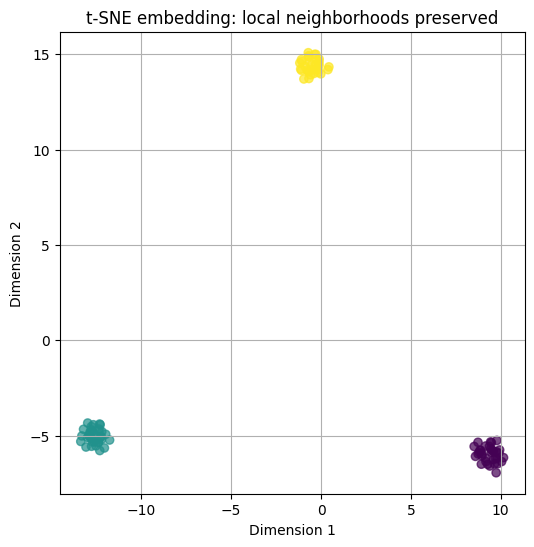

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Step 1: Generate synthetic 5D data with 3 clusters
X, y = make_blobs(n_samples=100, centers=3, n_features=5, random_state=42)

# Step 2: Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Step 3: Fit and transform data
X_embedded = tsne.fit_transform(X)

# Step 4: Plot the low-dimensional embedding
plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("t-SNE embedding: local neighborhoods preserved")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()